Grip@The Sparks Foundation

Task : 3 Exploratory Data Analysis - Retail

Author:Jawher GUEMRI

# Importing libraries

In [106]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [107]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [108]:
data.shape

(9994, 13)

In [109]:
data.dtypes.value_counts()

object     8
float64    3
int64      2
dtype: int64

In [110]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [111]:
#checking the duplicates records
data.duplicated().sum()

17

In [112]:
#droping the duplicates records
data=data.drop_duplicates()

In [113]:
#final dimension
data.shape

(9977, 13)

In [114]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [115]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [116]:
data=data.drop(columns='Postal Code')

# Visualising the Data

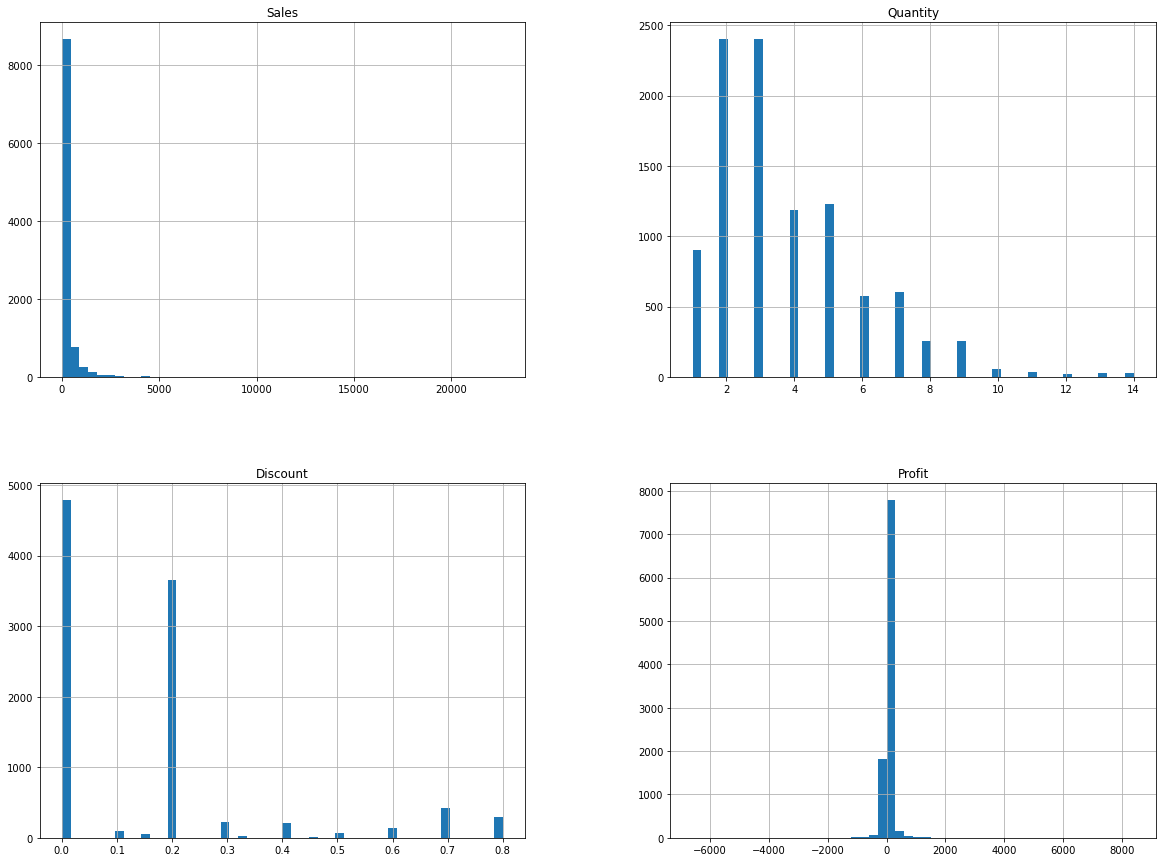

In [117]:
data.hist(bins=50 ,figsize=(20,15))
plt.show();

C:\Users\jawhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jawhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jawhe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

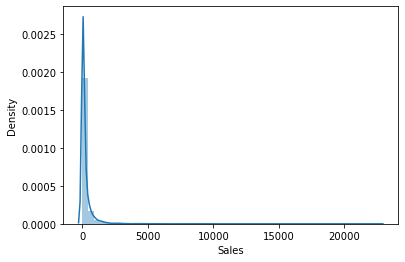

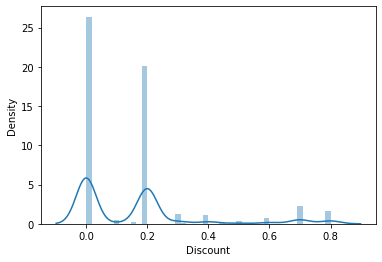

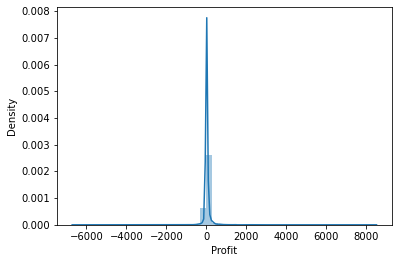

In [118]:
for col in data.select_dtypes('float') : #variables continues standardisées, skewed (asymétriques), test sanguin
    plt.figure()
    sns.distplot(data[col])

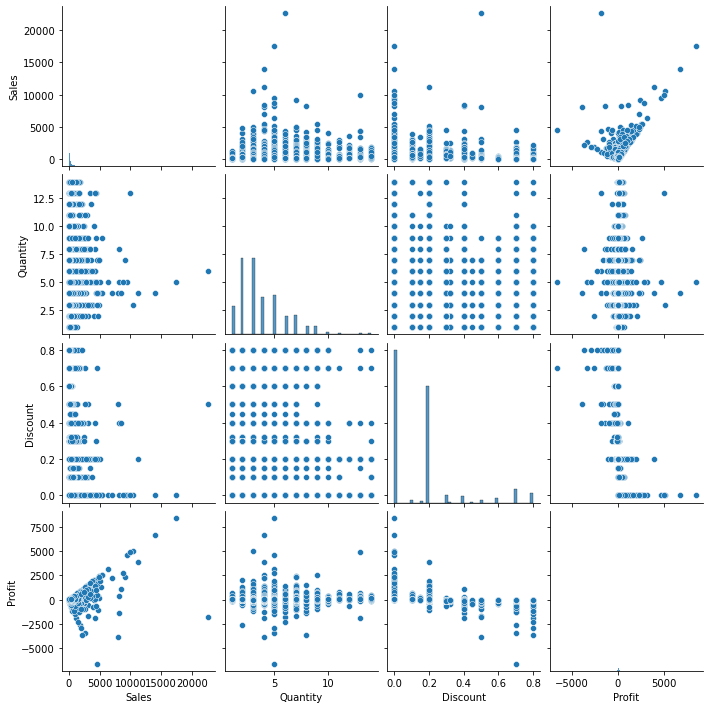

In [119]:
sns.pairplot(data)  # relations Taux Sanguin

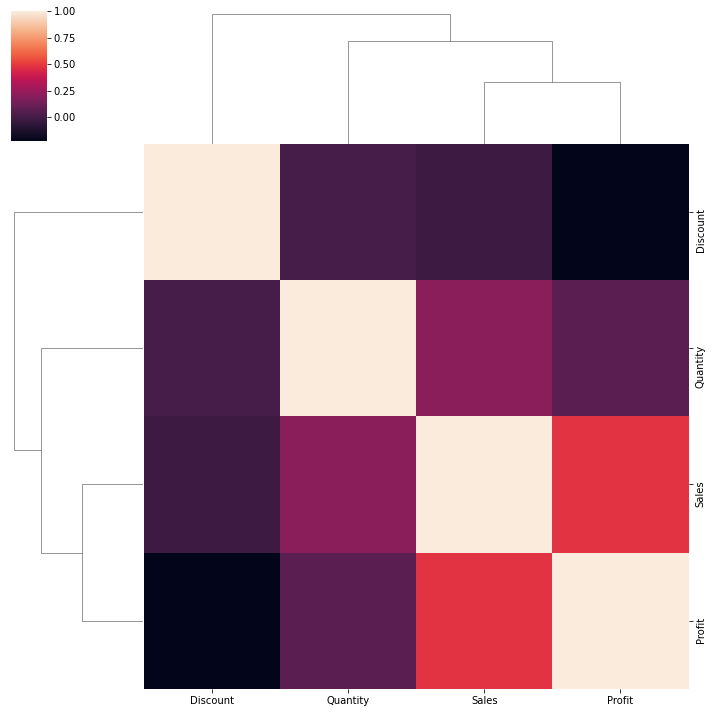

In [120]:
sns.clustermap(data.corr())

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Region']= encoder.fit_transform(data['Region'])

In [122]:
data

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,2,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,3,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,3,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,3,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [123]:
encoder.classes_

array(['Central', 'East', 'South', 'West'], dtype=object)

In [124]:
data['State'].unique().shape

(49,)

In [125]:
data.corr()

,Region,Sales,Quantity,Discount,Profit
Region,1.000000,0.004508,0.013606,-0.211995,0.022295
Sales,0.004508,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013606,0.200722,1.000000,0.008678,0.066211
Discount,-0.211995,-0.028311,0.008678,1.000000,-0.219662
Profit,0.022295,0.479067,0.066211,-0.219662,1.000000


In [126]:
data['Country'].unique().shape

(1,)

In [127]:
data['Country'].unique().shape

(1,)

In [128]:
df = data.copy()

In [129]:
df_area = df.loc[:,['Region','Profit']]

In [130]:
df_area

,Region,Profit
0,2,41.9136
1,2,219.5820
2,3,6.8714
3,2,-383.0310
4,2,2.5164
...,...,...
9989,2,4.1028
9990,3,15.6332
9991,3,19.3932
9992,3,13.3200


# Profit per Region

In [131]:
ByRegin = df_area.groupby('Region')

In [132]:
ByRegin.sum()

,Profit
Region,
0,39655.8752
1,91506.3092
2,46749.4303
3,108329.8079


# Profit per Sub-Category

In [133]:
Sub_cat=pd.DataFrame()
Sub_cat['Sub-Category']=df['Sub-Category']
Sub_cat['Profit']=df.groupby('Sub-Category')['Profit'].transform('sum')
Sub_cat.drop_duplicates(inplace=True)
Sub_cat

,Sub-Category,Profit
0,Bookcases,-3472.5560
1,Chairs,26567.1278
2,Labels,5526.3820
3,Tables,-17725.4811
4,Storage,21278.8264
5,Furnishings,13052.7230
6,Art,6524.6118
7,Phones,44515.7306
8,Binders,30228.0003
9,Appliances,18138.0054


# Profit per State

In [134]:
ByState = df.groupby('State')
ByState.mean()

,Region,Sales,Quantity,Discount,Profit
State,,,,,
Alabama,2.0,319.846557,4.196721,0.000000,94.865989
Arizona,3.0,157.508933,3.848214,0.303571,-15.303235
Arkansas,2.0,194.635500,4.000000,0.000000,66.811452
California,3.0,229.246629,3.832164,0.072946,38.241878
Colorado,3.0,176.418231,3.807692,0.316484,-35.867351
Connecticut,1.0,163.223866,3.426829,0.007317,42.823071
Delaware,1.0,285.948635,3.822917,0.006250,103.930988
District of Columbia,1.0,286.502000,4.000000,0.000000,105.958930
Florida,2.0,233.612815,3.600522,0.299347,-8.875461


# Profit per City

In [135]:
#Column city in areas contains each city 
Areas=pd.DataFrame()
Areas['City']=data['City']

In [136]:
Areas['Profit']=data.groupby('City')['Profit'].transform('sum')
#removing the repetitive rows 
Areas.drop_duplicates(inplace=True)
Areas.head(10)

,City,Profit
0,Henderson,4911.8609
2,Los Angeles,30431.4267
3,Fort Lauderdale,-161.3551
12,Concord,-718.6389
13,Seattle,29121.6825
14,Fort Worth,298.7327
16,Madison,1123.6552
17,West Jordan,102.6723
18,San Francisco,17466.1186
21,Fremont,179.4696


the WEST is the area that you should work in to make more profit

business problem 1 : we have sub-category with negative value of profit

business problem 2 : we have cities with negative value of profit